In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


## Create random data 

In [50]:
class_1 = np.random.random(20)*2 + 1
class_2 = np.random.random(20)*2 - 0.5
x_array = np.concatenate([class_1,class_2])
y_array = [0]*20 + [1]*20

In [51]:
df = pd.DataFrame({'x':x_array,'y':y_array})
df.head()

,x,y
0,2.584961,0
1,1.050502,0
2,1.260778,0
3,1.554894,0
4,2.328828,0


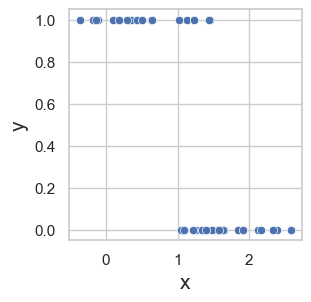

In [52]:
fig, ax = plt.subplots(figsize=(3,3))

sns.set_theme(style='whitegrid')
sns.scatterplot(data=df,x='x',y='y',ax=ax)
ax.set_xlabel('x',fontsize=15)
ax.set_ylabel('y',fontsize=15)
plt.show()

## My code: Use gradient descent to minimize the log loss

In [53]:
def compute_gradient(beta,x,y):
    gradient = np.zeros(2)
    p = 1/(1+np.exp(-(beta[0]+beta[1]*x)))
    gradient[0] = sum(p-y)
    gradient[1] = sum((p-y)*x)
    return gradient
    

In [63]:
beta_start = np.zeros(2)
tol = 0.001
max_iter = 1000
learning_rate = 0.1

diff = np.inf
beta = beta_start 
for k in range(max_iter):
    gradient = compute_gradient(beta,df['x'].values,df['y'].values)
    diff = learning_rate*gradient
    if abs(sum(diff)) < tol:
        break 
    beta = beta - diff 
print(f"The total number of iterations is {k}.")
print('beta_0: %s'% beta[0])
print('beta_1: %s'% beta[1])


The total number of iterations is 182.
beta_0: 6.036623001616827
beta_1: -5.120237993743074


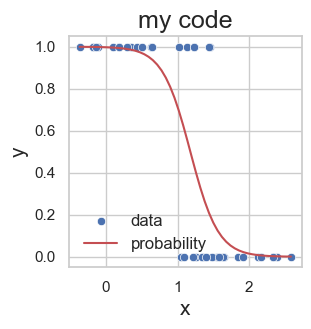

In [64]:
fig, ax = plt.subplots(figsize=(3,3))
sns.scatterplot(data=df,x='x',y='y',ax=ax)
xvec = np.linspace(min(x_array),max(x_array),50)
fitted_prob = lambda x: 1/(1+np.exp(-(beta[0]+beta[1]*x)))
ax.plot(xvec,fitted_prob(xvec),'r-')
ax.set_xlabel('x',fontsize=15)
ax.set_ylabel('y',fontsize=15)
ax.legend(labels=['data','probability'],frameon=False,loc='lower left',fontsize=12)
ax.set_title('my code',fontsize=18)
plt.show()

## Rewrite everything as a  function 

In [65]:
def logistic_regression(df,grad_fun,tol,max_iter,learning_rate,beta_start):
    beta = beta_start 
    diff = np.inf
    for k in range(max_iter):
        gradient = compute_gradient(beta,df['x'].values,df['y'].values)
        diff = learning_rate*gradient
        if abs(sum(diff)) < tol:
            break 
        beta = beta - diff 
    print(f"The total number of iterations is {k}.")
    return beta 

def compute_gradient(beta,x,y):
    gradient = np.zeros(2)
    p = 1/(1+np.exp(-(beta[0]+beta[1]*x)))
    gradient[0] = sum(p-y)
    gradient[1] = sum((p-y)*x)
    return gradient

In [66]:
beta_start = np.zeros(2)
tol = 0.001
max_iter = 1000
learning_rate = 0.1

beta_output = logistic_regression(df,compute_gradient,tol,max_iter,learning_rate,beta_start)
print('beta_0: %s'% beta_output[0])
print('beta_1: %s'% beta_output[1])

The total number of iterations is 182.
beta_0: 6.036623001616827
beta_1: -5.120237993743074


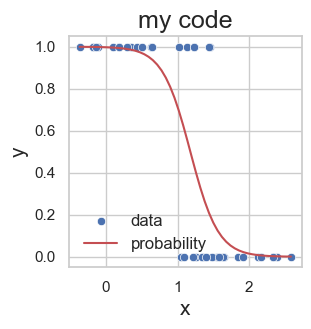

In [67]:
fig, ax = plt.subplots(figsize=(3,3))
sns.scatterplot(data=df,x='x',y='y',ax=ax)
xvec = np.linspace(min(x_array),max(x_array),50)
fitted_prob = lambda x: 1/(1+np.exp(-(beta_output[0]+beta_output[1]*x)))
ax.plot(xvec,fitted_prob(xvec),'r-')
ax.set_xlabel('x',fontsize=15)
ax.set_ylabel('y',fontsize=15)
ax.legend(labels=['data','probability'],frameon=False,loc='lower left',fontsize=12)
ax.set_title('my code',fontsize=18)
plt.show()

## Use the sklearn package

In [56]:
clf = LogisticRegression(penalty='none')
clf.fit(x_array.reshape(-1,1),y_array)

print('beta_0: %s'%clf.intercept_[0])
print('beta_1: %s'%clf.coef_[0][0])

beta_0: 6.514509124517772
beta_1: -5.490575216698724


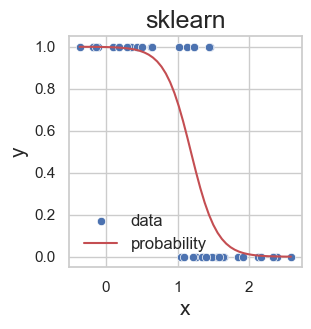

In [69]:
fig, ax = plt.subplots(figsize=(3,3))
sns.scatterplot(data=df,x='x',y='y',ax=ax)
x_array.sort()
fitted_prob_sk = lambda x: 1/(1+np.exp(-(clf.intercept_[0]+clf.coef_[0][0]*x)))
ax.plot(xvec,fitted_prob_sk(xvec),'r-',label = 'Probabiity')
ax.set_xlabel('x',fontsize=15)
ax.set_ylabel('y',fontsize=15)
ax.legend(labels=['data','probability'],frameon=False,loc='lower left',fontsize=12)
ax.set_title('sklearn',fontsize=18)
plt.show()